# **Binary Classification with a Bank Churn Dataset**


### **Importing libraries**

In [ ]:

import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import recall_score, accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest


### **Loading  the datasets came  from kaggle, تحميل البيانات  **

In [ ]:
url_train = r'/content/drive/MyDrive/train_kaggle_2024.csv'
url_test = r'/content/drive/MyDrive/test_kaggle_2024.csv'

In [ ]:
##הורדת הנתונים
train_df = pd.read_csv(url_train)
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (165034, 14)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


ROWS : 165034
Columns : 14

In [ ]:
#הורדת הנתונים
test_df = pd.read_csv(url_test)
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (110023, 13)


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


Test Set
Rows : 110023
Columns : 13

### **Data cleaning on the train_df **

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
# checking for duplicate values
train_df.duplicated().sum()

0

their are no duplicates in the datasets

In [ ]:
# let check for missing values
train_df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

non of the columns contain missing values

it appears that our datasets is free from duplicates, missing values and the columns are formatted correctly


## EDA - Exploratory Data Analysis

In [ ]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [ ]:
# count  of how many time uniqe values appeared in churn
churn_counts = train_df['Exited'].value_counts()

# Calculate the churn rate
total_customers = train_df['Exited'].count()
churn_rate = churn_counts[1] / total_customers
print("Descriptive Statistics for Exited:")
print(churn_counts)
print(f"churn Rate: {churn_rate:.2%}")

Descriptive Statistics for Exited:
0    130113
1     34921
Name: Exited, dtype: int64
churn Rate: 21.16%


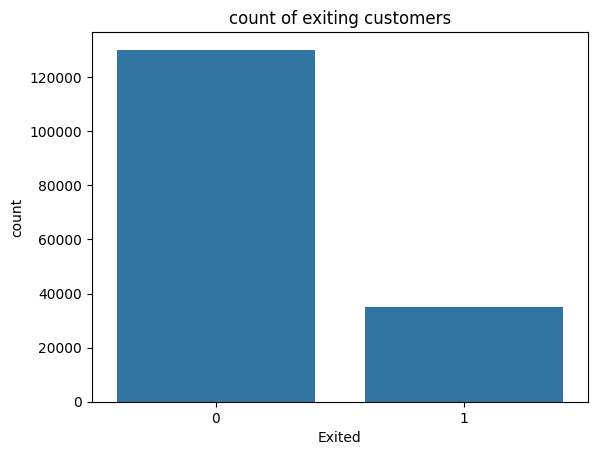

In [ ]:
# visualization with  bar plot
sns.countplot(data= train_df, x='Exited')
plt.title("count of exiting customers")
plt.show()

### **Seperating numerical columns and categorical columns**

In [ ]:
train_df.drop(columns=['CustomerId'], inplace=True)

In [ ]:
# numerical feature
numerical_feature = {feature for feature in train_df.columns if train_df[feature].dtypes != 'O'}
print(f'Count of Numerical feature: {len(numerical_feature)}')
print(f'Numerical feature are:\n {numerical_feature}')


Count of Numerical feature: 10
Numerical feature are:
 {'id', 'HasCrCard', 'CreditScore', 'IsActiveMember', 'Age', 'Tenure', 'Balance', 'EstimatedSalary', 'NumOfProducts', 'Exited'}


we have 11 columns that are numerical

In [ ]:
# categorical features
categorical_feature = {feature for feature in train_df.columns if train_df[feature].dtypes == 'O'}
print(f'Count of Categorical feature: {len(categorical_feature)}')
print(f'Categorical feature are:\n {categorical_feature}')


Count of Categorical feature: 3
Categorical feature are:
 {'Surname', 'Gender', 'Geography'}


we have 3 columns that are categorical

## Univariante Data Visualizations
 visualisations to help us understand the datasets and the churn behaviour accross the varius variables

In [ ]:
def bar_plot(data, group, target):

    fig, ax = plt.subplots(figsize=(12, 6))
    temp_df = (data.groupby([group, target]).size() / data.groupby(group)[target].count()).reset_index().pivot(index=group, columns=target, values=0)
    temp_df.plot(kind='bar', stacked=False, ax=ax, color=["blue", "darkred", "green"], legend=True)
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn percentage')

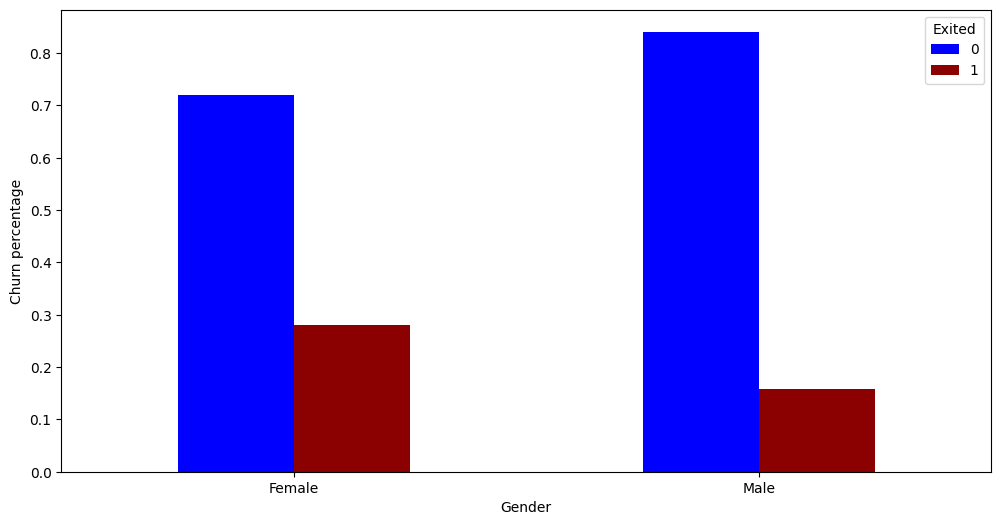

In [ ]:
bar_plot(train_df, "Gender", "Exited")

The gender distribution shows that there are more women  Exiting/churning that is, closing up there bank accounts than men. although on a general scale the churning rate based on gender is small compared to non-churn

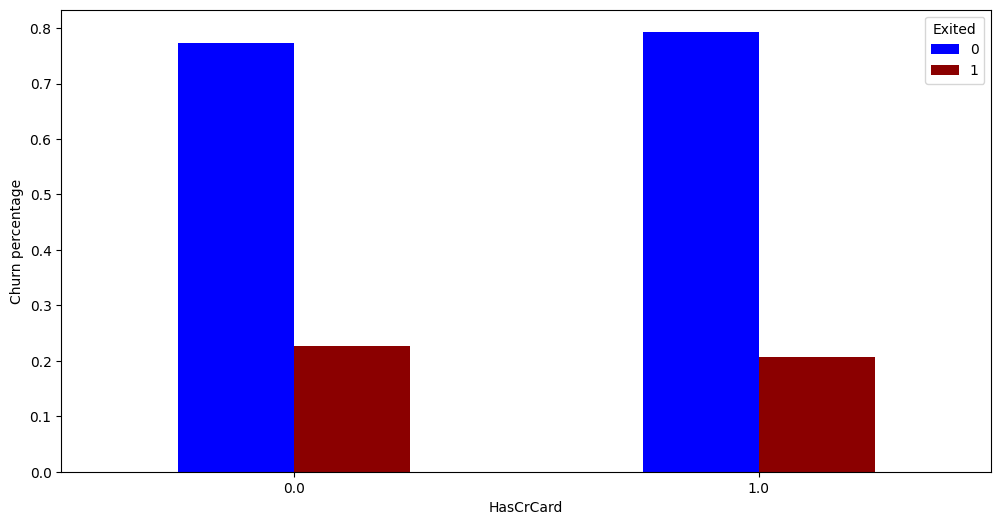

In [ ]:
bar_plot(train_df, "HasCrCard", "Exited")

customers without card has the tendency of churning more than customers with cards

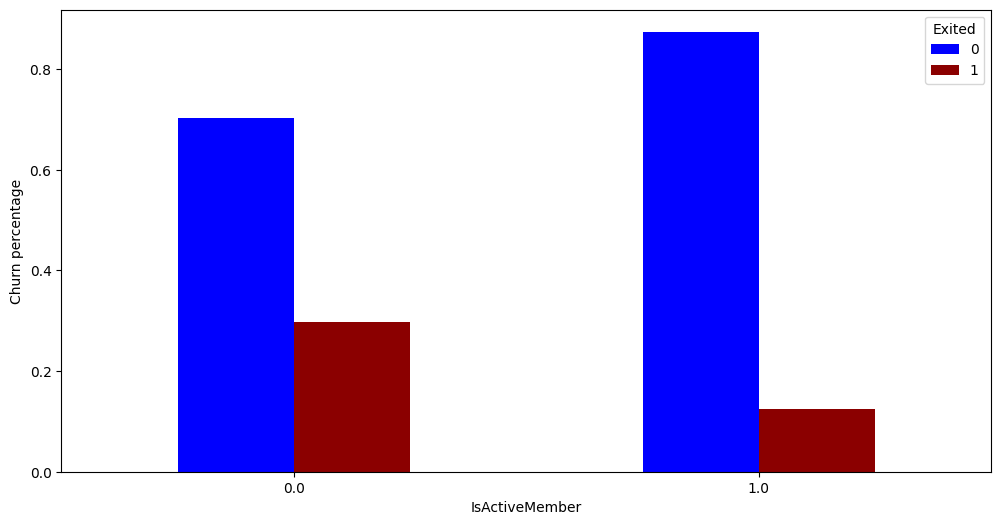

In [ ]:
bar_plot(train_df, "IsActiveMember", "Exited")

from the above plot, we can conclude that customers that are not active are more likly to churn or close their accounts than active customers

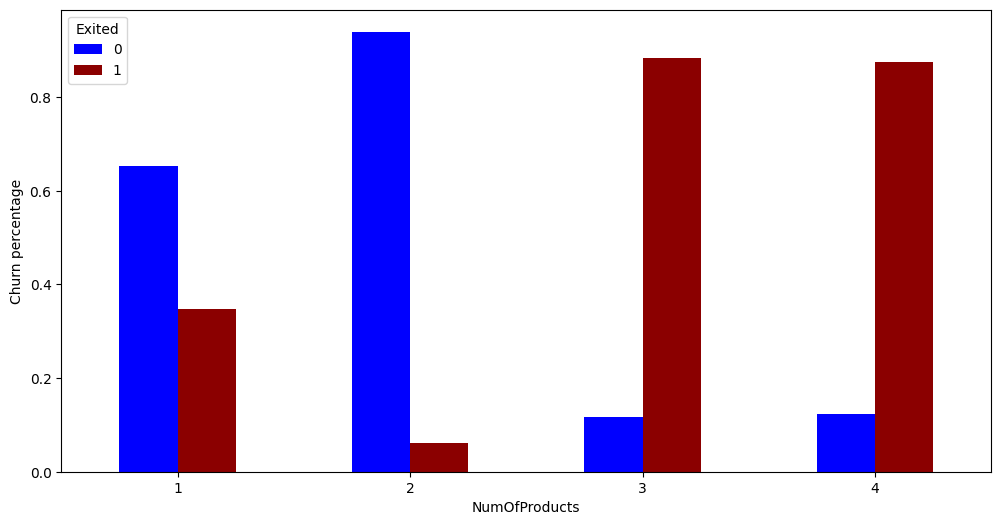

In [ ]:
bar_plot(train_df, "NumOfProducts", "Exited")

from the above plots, the following insights can be drawn from number of products based distribution:

* customers registered to only one product have more than 60% chance of keeping their acoounts and more than 30% churning rate

* customers with 2 registered products tends to have about 96% chance of keeping their account and less than 4% tendency of churning

* for customers with 3 to 4 products, the rate at which customers close up their accounts tends to spike drastically. about 90% have the tendency to churn while only 10% keeps their account

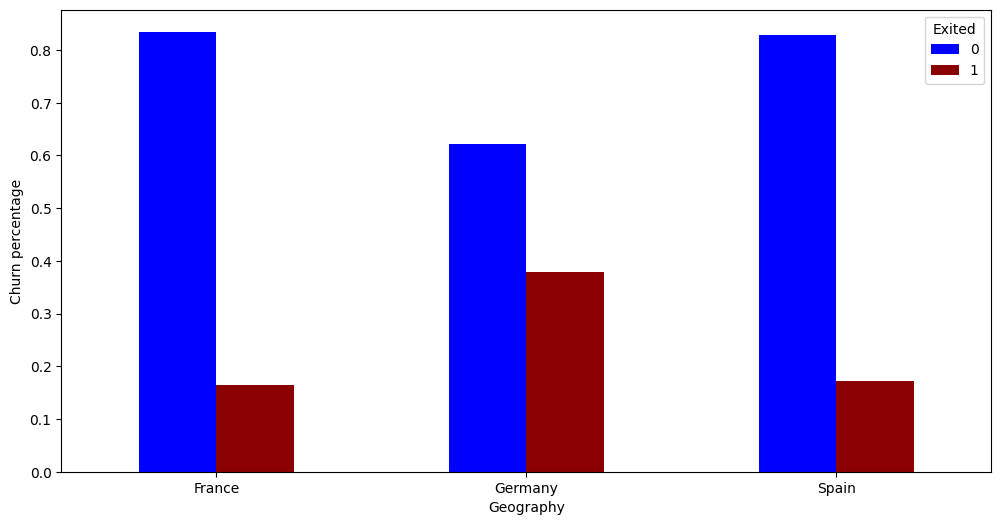

In [ ]:
bar_plot(train_df, "Geography", "Exited")

German customers possess the highest tendency to churn  with close to 40% churning rate and 60% percent non-churning rate

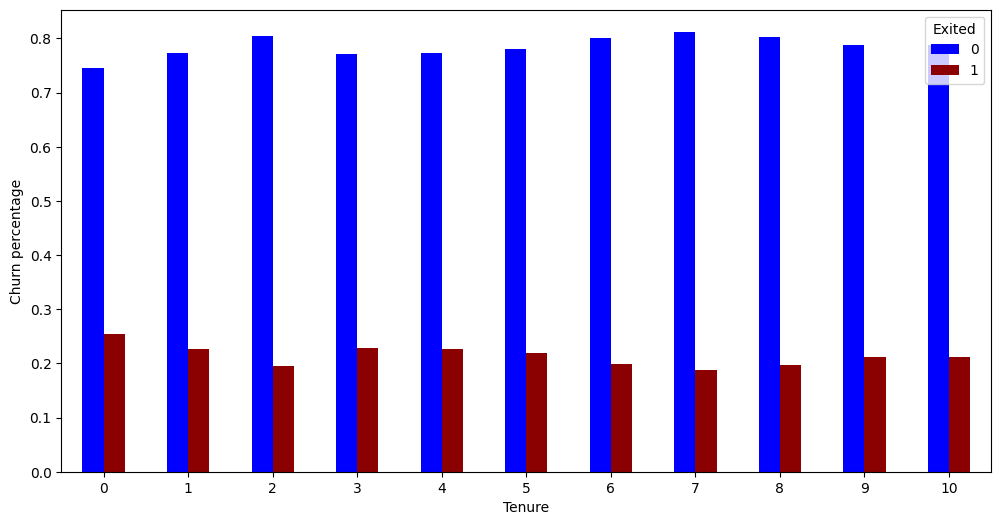

In [ ]:
bar_plot(train_df, "Tenure", "Exited")

although the churning rate is approximately same for the various number of tenures, new members tends to possess the highest tendency to churn

<Axes: >

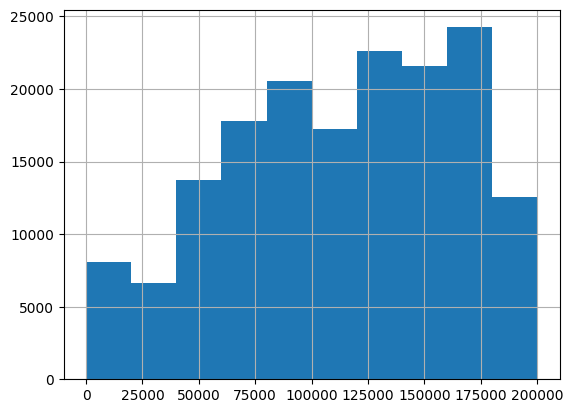

In [ ]:
train_df.EstimatedSalary.hist()

<Axes: >

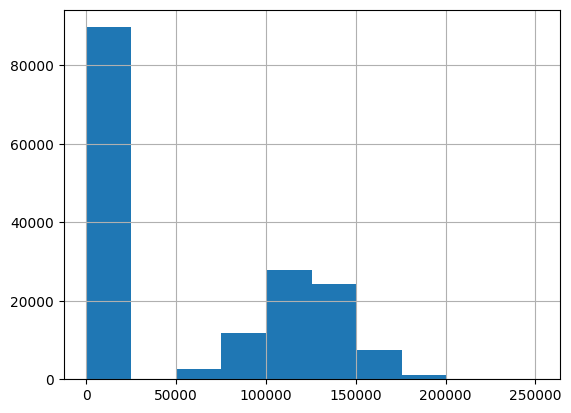

In [ ]:
train_df.Balance.hist()

from the histogram of customer account balance, we can draw the following conclusion:

* more than 85000 customers have less than $25000 in their accounts

* About 24000 customers have $100000 to $150000 in their accounts

* Less than 17000 customers have $50000 to $100000  and $150000 to $200000 their accounts

<Axes: >

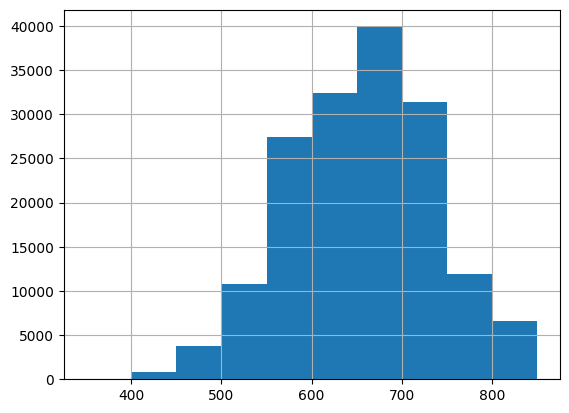

In [ ]:
train_df.CreditScore.hist()

from the histogram plot of customer credit score, the following conclusion can be made:

* Customers with 400 to 500 credit scores are less than 5000
* about 25000 to 40000 customers have credit scores from 550 to 750
* 40000 Customer have credit score ranging from 650 to 700

## **Encoding Categorical Features for Train_df**

In [ ]:
print(categorical_feature)

{'Surname', 'Gender', 'Geography'}


In [ ]:
# encoding categorical feature
cat_encoder = LabelEncoder()
for features in categorical_feature:
  train_df[features] = cat_encoder.fit_transform(train_df[features])

In [ ]:
# let drop surname from the train_df
train_df.drop(columns=['Surname'], inplace=True )

In [ ]:
train_df.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0


now we will check the correlation of the columns with the target column (Exited)

<Axes: >

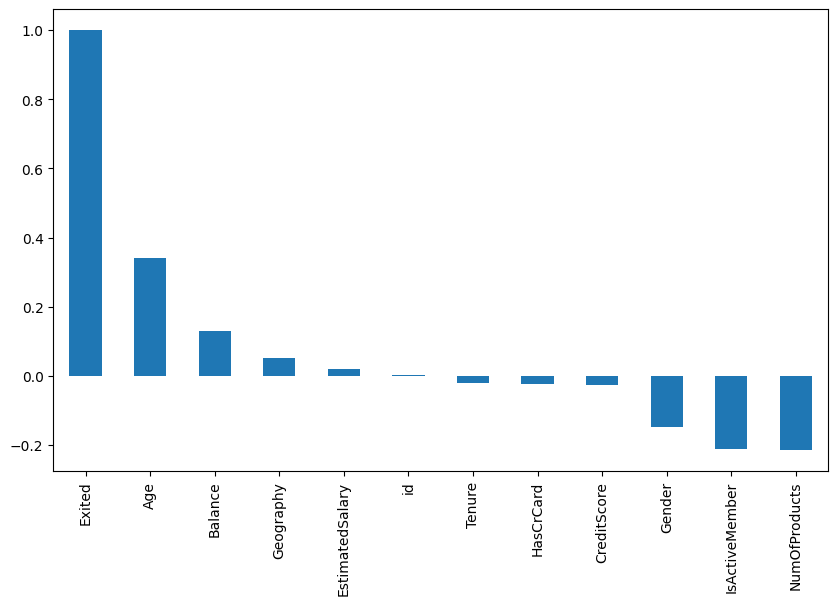

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10,6))
train_df.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')


<Axes: >

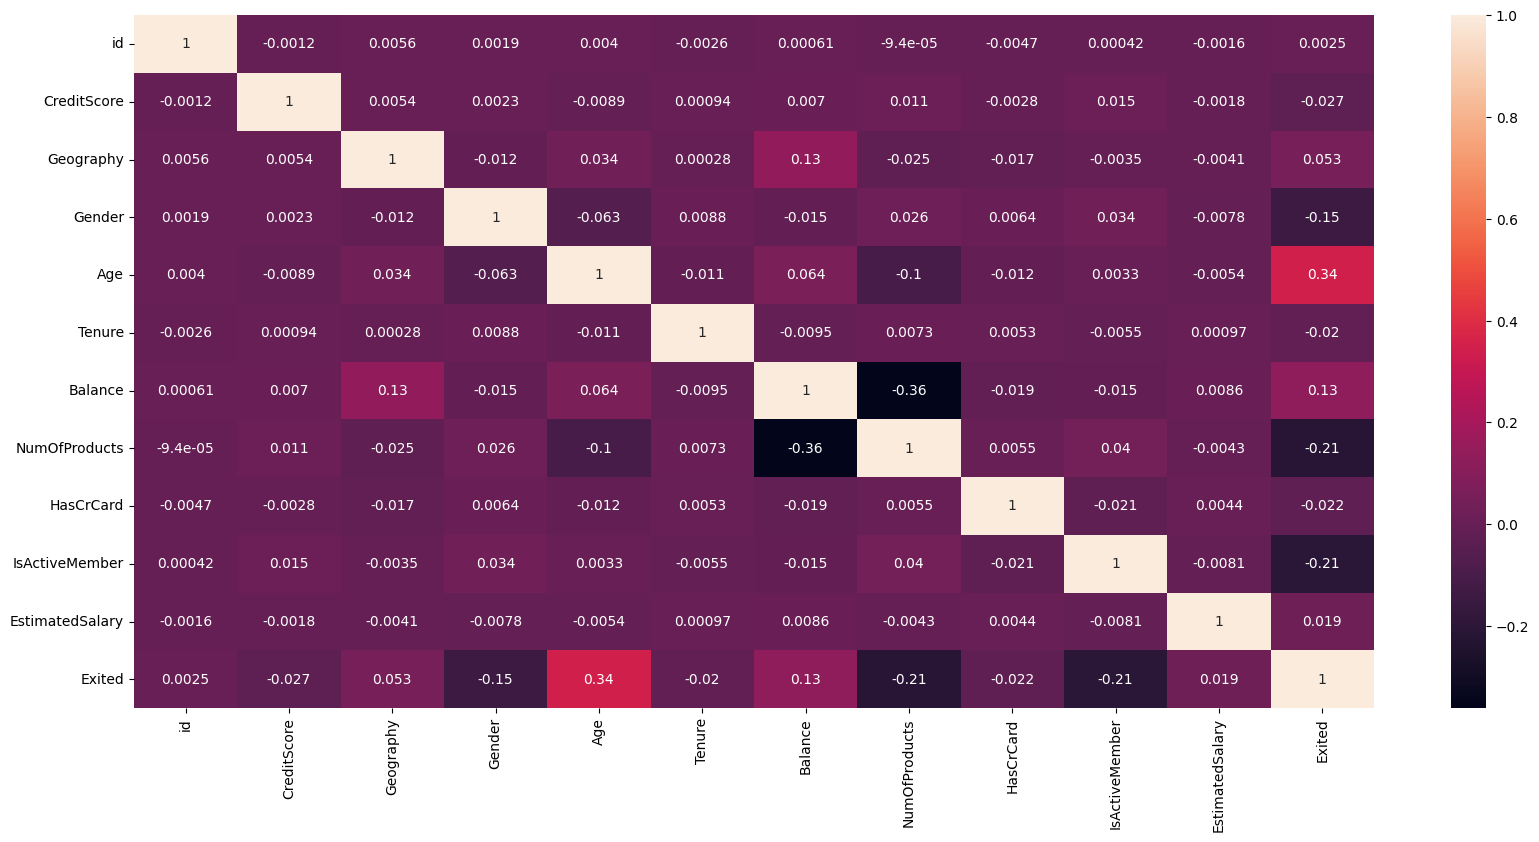

In [ ]:

plt.figure(figsize=(20, 9))
sns.heatmap(train_df.corr(), annot=True)

## **Encoding the test_df**

In [ ]:
test_df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
# let drop the mer id
test_df.drop(columns=['CustomerId', 'Surname'], inplace=True)

now  we perform encoding of the categorical features

In [ ]:
test_cat_encoder = LabelEncoder()
for features in test_df.columns:
  test_df[features] = test_cat_encoder.fit_transform(test_df[features])

In [ ]:
test_df.head()

,id,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,189,0,0,5,2,0,1,0,1,33249
1,1,286,0,0,31,2,0,0,1,0,9388
2,2,259,0,0,17,7,0,1,1,0,26856
3,3,284,0,1,19,8,0,0,1,0,19659
4,4,355,1,1,22,10,10405,0,1,0,26934


## **Feature selection**

spliting the train_df into dependent (Y) and independent variable(X)

In [ ]:
X = train_df.drop(columns = 'Exited')
Y = train_df['Exited']

we will be selecting the best 7 features with the best correlation with the churn column

In [ ]:
selection = SelectKBest(k=10)
X = selection.fit_transform(X,Y)

now let us display the features with the best correlation, this features will appear as true or false

In [ ]:
selection.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [ ]:
train_df.columns

Index(['id', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

this are the best features

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],

In [ ]:
# splitting inot train and test sets randomstate=42
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [ ]:
print("the shape of the X_train data", x_train.shape)
print("the shape of the X_test data", x_test.shape)
print("the shape of the y_train data", y_train.shape)
print("the shape of the y_test data", y_test.shape)

the shape of the X_train data (132027, 10)
the shape of the X_test data (33007, 10)
the shape of the y_train data (132027,)
the shape of the y_test data (33007,)


## **Machine Learning**

### **Training and Testing Logistic regression model**

In [ ]:
# let fit the model
lr_model = LogisticRegression(C=150, max_iter=150)
lr_model.fit(x_train, y_train)

LogisticRegression(C=150, max_iter=150)

In [ ]:
# let predict
lr_pred = lr_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(lr_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_pred, y_test)}')
print(f'Classification report :\n {classification_report(lr_pred, y_test)}')

Accuracy score : 0.7879843669524647
Confusion matrix :
 [[25140  6086]
 [  912   869]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.81      0.88     31226
           1       0.12      0.49      0.20      1781

    accuracy                           0.79     33007
   macro avg       0.54      0.65      0.54     33007
weighted avg       0.92      0.79      0.84     33007



the accuracy score of the logistic regression model is 78.7%, the model was able to predict non churn at 96% but could not predict churn well 12%.

## **Training RandomRegression Model**

In [ ]:
R_model = RandomForestClassifier(n_estimators=120,criterion='gini', max_depth=15, min_samples_leaf=100, min_samples_split=5)
R_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=5,
                       n_estimators=120)

In [ ]:
R_pred = R_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(R_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(R_pred, y_test)}')
print(f'Classification report :\n {classification_report(R_pred, y_test)}')

Accuracy score : 0.8613930378404581
Confusion matrix :
 [[24963  3486]
 [ 1089  3469]]
Classification report :
               precision    recall  f1-score   support

           0       0.96      0.88      0.92     28449
           1       0.50      0.76      0.60      4558

    accuracy                           0.86     33007
   macro avg       0.73      0.82      0.76     33007
weighted avg       0.89      0.86      0.87     33007



The random forest model performed better than the logistic regression, with an accuracy score of 86%, the precision, recall and f1-score are abit improved but not quite close to what we want

## Training using Decision Tree

In [ ]:
# Training using Decision Tree
tree_model = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
tree_model.fit(x_train, y_train)


DecisionTreeClassifier(min_samples_leaf=15, splitter='random')

In [ ]:
tree_pred = tree_model.predict(x_test)

print(f'Accuracy score : {accuracy_score(tree_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(tree_pred, y_test)}')
print(f'Classification report :\n {classification_report(tree_pred, y_test)}')


Accuracy score : 0.8579089284091254
Confusion matrix :
 [[24600  3238]
 [ 1452  3717]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.88      0.91     27838
           1       0.53      0.72      0.61      5169

    accuracy                           0.86     33007
   macro avg       0.74      0.80      0.76     33007
weighted avg       0.88      0.86      0.87     33007



The Decision tree model performed better than the logistic regression too but slightly less than the Randomforest, with an accuracy score of 85%, the precision, recall and f1-score are abit improved but not quite close to what we want

## **Training_gradient_boosting**

In [ ]:
# GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)

GradientBoostingClassifier()

In [ ]:
gbc_pred = gbc.predict(x_test)

print(f'Accuracy score : {accuracy_score(gbc_pred, y_test)}')
print(f'Confusion matrix :\n {confusion_matrix(gbc_pred, y_test)}')
print(f'Classification report :\n {classification_report(gbc_pred, y_test)}')

Accuracy score : 0.865513375950556
Confusion matrix :
 [[24830  3217]
 [ 1222  3738]]
Classification report :
               precision    recall  f1-score   support

           0       0.95      0.89      0.92     28047
           1       0.54      0.75      0.63      4960

    accuracy                           0.87     33007
   macro avg       0.75      0.82      0.77     33007
weighted avg       0.89      0.87      0.87     33007



the gradient boosting model still holds semilar results

our datasets is very imbalance which might affect the accuracy of our model performance, although our models performance seems ok. we need to do some over sampling on the data to reduce the occurances of TN, FN and and improve FP and TP of the model

## **Using SMOTEENN for imbalance dataset:**


In [ ]:

import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick # for showing percentage in it



In [ ]:
from imblearn.combine import SMOTEENN
from collections import Counter

smot = SMOTEENN()
x_train_2, y_train_2 = smot.fit_resample(x_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_2)))


The number of classes before fit Counter({0: 104061, 1: 27966})
The number of classes after fit Counter({1: 54479, 0: 46005})


In [ ]:
# splitting the over sampling dataset
x_train_sap, x_test_sap, y_train_sap, y_test_sap = train_test_split(x_train_2, y_train_2, test_size=0.2)


## Training Logistic Regression on the sampling set

In [ ]:
# Training Logistic Regression on the sampling
lr_samp = LogisticRegression(C=150, max_iter=150)
lr_samp.fit(x_train, y_train)

# making prediction
lr_samp_pred = lr_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(lr_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(lr_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(lr_samp_pred, y_test_sap)}')

Accuracy score : 0.5018161914713639
Confusion matrix :
 [[9001 9783]
 [ 229 1084]]
Classification report :
               precision    recall  f1-score   support

           0       0.98      0.48      0.64     18784
           1       0.10      0.83      0.18      1313

    accuracy                           0.50     20097
   macro avg       0.54      0.65      0.41     20097
weighted avg       0.92      0.50      0.61     20097



training the Random forest

In [ ]:
# Random forest classifier
Rand_samp = RandomForestClassifier(n_estimators=150,criterion='gini', max_depth=15, min_samples_leaf=10, min_samples_split=6)
Rand_samp.fit(x_train_sap, y_train_sap)

# making predictions
Rand_samp_pred = Rand_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(Rand_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(Rand_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(Rand_samp_pred, y_test_sap)}')


Accuracy score : 0.9320296561675872
Confusion matrix :
 [[ 8654   790]
 [  576 10077]]
Classification report :
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      9444
           1       0.93      0.95      0.94     10653

    accuracy                           0.93     20097
   macro avg       0.93      0.93      0.93     20097
weighted avg       0.93      0.93      0.93     20097



training decision tree after sample

In [ ]:
# decisionTree Classifier
tree_samp_model = DecisionTreeClassifier(criterion='gini', splitter='random', min_samples_leaf=15)
tree_samp_model.fit(x_train_sap, y_train_sap)
# predicting

tree_samp_pred = tree_samp_model.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(tree_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(tree_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(tree_samp_pred, y_test_sap)}')


Accuracy score : 0.9030701099666617
Confusion matrix :
 [[8515 1233]
 [ 715 9634]]
Classification report :
               precision    recall  f1-score   support

           0       0.92      0.87      0.90      9748
           1       0.89      0.93      0.91     10349

    accuracy                           0.90     20097
   macro avg       0.90      0.90      0.90     20097
weighted avg       0.90      0.90      0.90     20097



training the gradient boosting model after sampling

In [ ]:
# GradientBoostingClassifier
gbc_samp = GradientBoostingClassifier()
gbc_samp.fit(x_train_sap, y_train_sap)

# making prediction
gbc_samp_pred = gbc_samp.predict(x_test_sap)

print(f'Accuracy score : {accuracy_score(gbc_samp_pred, y_test_sap)}')
print(f'Confusion matrix :\n {confusion_matrix(gbc_samp_pred, y_test_sap)}')
print(f'Classification report :\n {classification_report(gbc_samp_pred, y_test_sap)}')

Accuracy score : 0.9308354480768274
Confusion matrix :
 [[ 8622   782]
 [  608 10085]]
Classification report :
               precision    recall  f1-score   support

           0       0.93      0.92      0.93      9404
           1       0.93      0.94      0.94     10693

    accuracy                           0.93     20097
   macro avg       0.93      0.93      0.93     20097
weighted avg       0.93      0.93      0.93     20097

